# Data Description:

The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled).The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

# Domain:
Material manufacturing

# Context:

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

# Information:

● Cement : measured in kg in a m3 mixture

● Blast : measured in kg in a m3 mixture

● Fly ash : measured in kg in a m3 mixture

● Water : measured in kg in a m3 mixture

● Superplasticizer : measured in kg in a m3 mixture

● Coarse Aggregate : measured in kg in a m3 mixture

● Fine Aggregate : measured in kg in a m3 mixture

● Age : day (1~365)

● Concrete compressive strength measured in MPa Learning Outcomes:

● Exploratory Data Analysis

● Building ML models for regression

● Hyper parameter tuning

# Objective:

Modeling of strength of high performance concrete using Machine Learning

# Import libraries and read the Data

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
df_concrete=pd.read_csv('concrete.csv')
df_raw=pd.read_csv('concrete.csv')
df_concrete.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


# EDA -Exploratory Data Analysis

### shape of data

In [4]:
#Shape of data
df_concrete.shape

(1030, 9)

### data types

In [5]:
df_concrete.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

### descriptive info

In [6]:
#Descriptive info -- This will help us to do the first hand analysis of the data
df_concrete.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


### some key observation from descriptive info

1. following attributes are distinctly positively skewed
    
    a. **cement**
    b. **slag**
    c. **ash**
    d. **age**


2. median of feature **ash** looks suspicious

# Check for Null values

In [7]:
df_concrete.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

It looks like we dont have any null values , next we will check for digit or 0 values 

# Check for non numeric values


In [8]:
df_concrete.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

cement          True
slag            True
ash             True
water           True
superplastic    True
coarseagg       True
fineagg         True
age             True
strength        True
dtype: bool

This proves that data do not contains any digit or non numeric value

# Checking columns containing 0 values

In [9]:
import numpy as np
df_concrete_orig=df_concrete.copy()
df_concrete=df_concrete.replace(0,np.nan)
df_concrete.isna().sum()

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

# Observation on Zero values

1. There are around 40- 50% of zero values in slag\ash\superplastic , which looks suspicious.

2. lets proceed with replacement first and will see what is the outcome

# Replacing null values with the median

In [10]:
df_concrete=df_concrete.apply(lambda x:x.fillna(x.median()))
df_concrete.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,135.948932,53.279837,11.00,129.800,135.700,142.950,359.4
ash,1030.0,120.899417,22.595744,24.50,121.400,121.400,121.400,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,9.663495,3.645923,1.70,8.200,9.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# Verify again if any missing values are present 


In [11]:
df_concrete.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

# percentile for dataframe



In [12]:
#Finding the percentil of data using quantile function
df_concrete.quantile([.25,.50,.75],axis=0)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0.25,192.375,129.80,121.4,164.9,8.2,932.0,730.95,7.0,23.710
0.50,272.900,135.70,121.4,185.0,9.4,968.0,779.50,28.0,34.445
0.75,350.000,142.95,121.4,192.0,10.2,1029.4,824.00,56.0,46.135


# Five Point Summary  Interquantile range for each columns,min,max

In [13]:
#Using lambda functions 
t=list(filter((lambda x: df_concrete[x].dtypes!='object'),df_concrete.columns))
t1=list(map((lambda x:df_concrete[x].quantile([.75]).iloc[0]-df_concrete[x].quantile([.25]).iloc[0]),t))
print (t1)
df_concrete_iqr=pd.DataFrame(columns=t,data=[t1],index=['iqr'])
df_concrete_iqr


[157.625, 13.149999999999977, 0.0, 27.099999999999994, 2.0, 97.40000000000009, 93.05000000000007, 49.0, 22.425000000000008]


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
iqr,157.625,13.15,0.0,27.1,2.0,97.4,93.05,49.0,22.425


In [14]:
#Finding minimum value 
df_concrete.min()

cement          102.00
slag             11.00
ash              24.50
water           121.80
superplastic      1.70
coarseagg       801.00
fineagg         594.00
age               1.00
strength          2.33
dtype: float64

In [15]:
#finding maximum value
df_concrete.max()

cement           540.0
slag             359.4
ash              200.1
water            247.0
superplastic      32.2
coarseagg       1145.0
fineagg          992.6
age              365.0
strength          82.6
dtype: float64

# SKEWNESS OF THE DATA

In [16]:
import scipy
scipy.stats.skew(df_concrete)
df_skew_data=pd.DataFrame(columns=df_concrete.columns,data=[scipy.stats.skew(df_concrete)])
df_skew_data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.508739,0.254063,-0.369314,0.07452,2.346596,-0.040161,-0.252641,3.264415,0.41637


We can see from above that **slag,superplastic,age,strength** have some postiviely skewd data, which also indicates presence of outliers.

**ash** have some negatively skewed data as well , a possible candidate for outliers.

# Finding outliers in data frame 

In [17]:
#Function to count outliers for each column
def counting_outliers(df):
    outlier_count=[]
    for item in df:
        q1,q3=df[item].quantile([.25]).iloc[0],df[item].quantile([.75]).iloc[0]
        IQR=q3-q1
        utv,ltv=q3+1.5*IQR,q1-1.5*IQR
        #print ('uthv--->'+str(utv))
        #print ('ltv---->'+str(ltv))
        outlier=[x for x in df[item] if x<ltv or x>utv]
        #print (outlier)
        outlier_count.append(len(outlier))
        print ('number of outliers for-->'+str(item)+'-->is:'+str(len(outlier)))
    return outlier_count
        

# Outliers count 

In [18]:
#using the function counting_outliers to count the number of outliers across each column
a=counting_outliers(df_concrete)
df_outlier_count=pd.DataFrame(columns=df_concrete.columns,data=[a])
df_outlier_count

number of outliers for-->cement-->is:0
number of outliers for-->slag-->is:406
number of outliers for-->ash-->is:459
number of outliers for-->water-->is:9
number of outliers for-->superplastic-->is:146
number of outliers for-->coarseagg-->is:0
number of outliers for-->fineagg-->is:5
number of outliers for-->age-->is:59
number of outliers for-->strength-->is:4


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0,406,459,9,146,0,5,59,4


In [19]:
#As detected from our skew data , we now can see that we have outliers present in 'slag','water','superplastic','fineagg','age'

# Visualizing outliers through boxplot

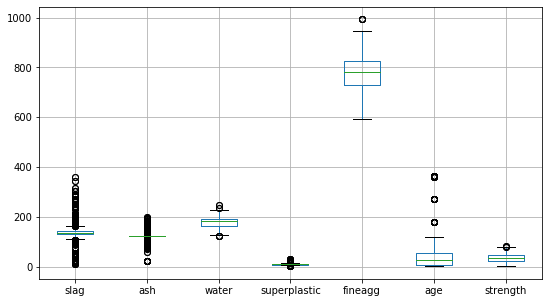

In [20]:
#df_concrete.boxplot(column=['slag','water','age','superplastic','strength'],figsize=(9,5))
outlier_columns=(df_outlier_count.loc[:, (df_outlier_count != 0).all(axis=0)].columns).tolist()
outlier_columns
df_concrete.boxplot(column=outlier_columns,figsize=(9,5))

# OBSERVATION ON OUTLIERS

1. There are huge number of outliers in slag and ash , around 40% , which again raises suspicion that may be these are not outliers and data is spread like this way.

2. Although i have created a function below to replace outliers with medain value, i am not going to use it as of now.

# Replacing outliers-(not used it bcz outliers looks valid)

In [21]:
def replacing_outliers(df):
    outlier_count=[]
    for item in df:
        df[item]=df[item].mask((df[item] - df[item].mean()).abs()> 1.5 * df[item].std(),axis=0)
        

In [22]:
#Handling the outliers by replacing them with median value

In [23]:
#replacing_outliers(df_concrete)
df_concrete.head(10)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,121.4,203.5,9.4,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,135.7,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,121.4,228.0,9.4,932.0,670.0,28,45.85
4,154.8,183.4,121.4,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,135.7,121.4,192.0,9.4,889.8,945.0,90,21.86
6,166.8,250.2,121.4,203.5,9.4,975.6,692.6,7,15.75
7,251.4,135.7,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,135.7,121.4,192.0,9.4,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


# Counting the nan values 

In [24]:
df_concrete.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

# Replacing nan values with median

In [25]:
df_concrete=df_concrete.apply(lambda x:x.fillna(x.median()))
df_concrete.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [26]:
df_concrete.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,121.4,203.5,9.4,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,135.7,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,121.4,228.0,9.4,932.0,670.0,28,45.85
4,154.8,183.4,121.4,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,135.7,121.4,192.0,9.4,889.8,945.0,90,21.86
6,166.8,250.2,121.4,203.5,9.4,975.6,692.6,7,15.75
7,251.4,135.7,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,135.7,121.4,192.0,9.4,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


# Using box plot again to see the outliers after replacing outliers with null values

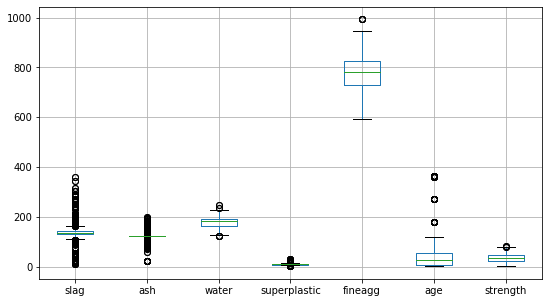

In [27]:
outlier_columns=(df_outlier_count.loc[:, (df_outlier_count != 0).all(axis=0)].columns).tolist()
outlier_columns
df_concrete.boxplot(column=outlier_columns,figsize=(9,5))

# BIVARIATE ANALYSIS

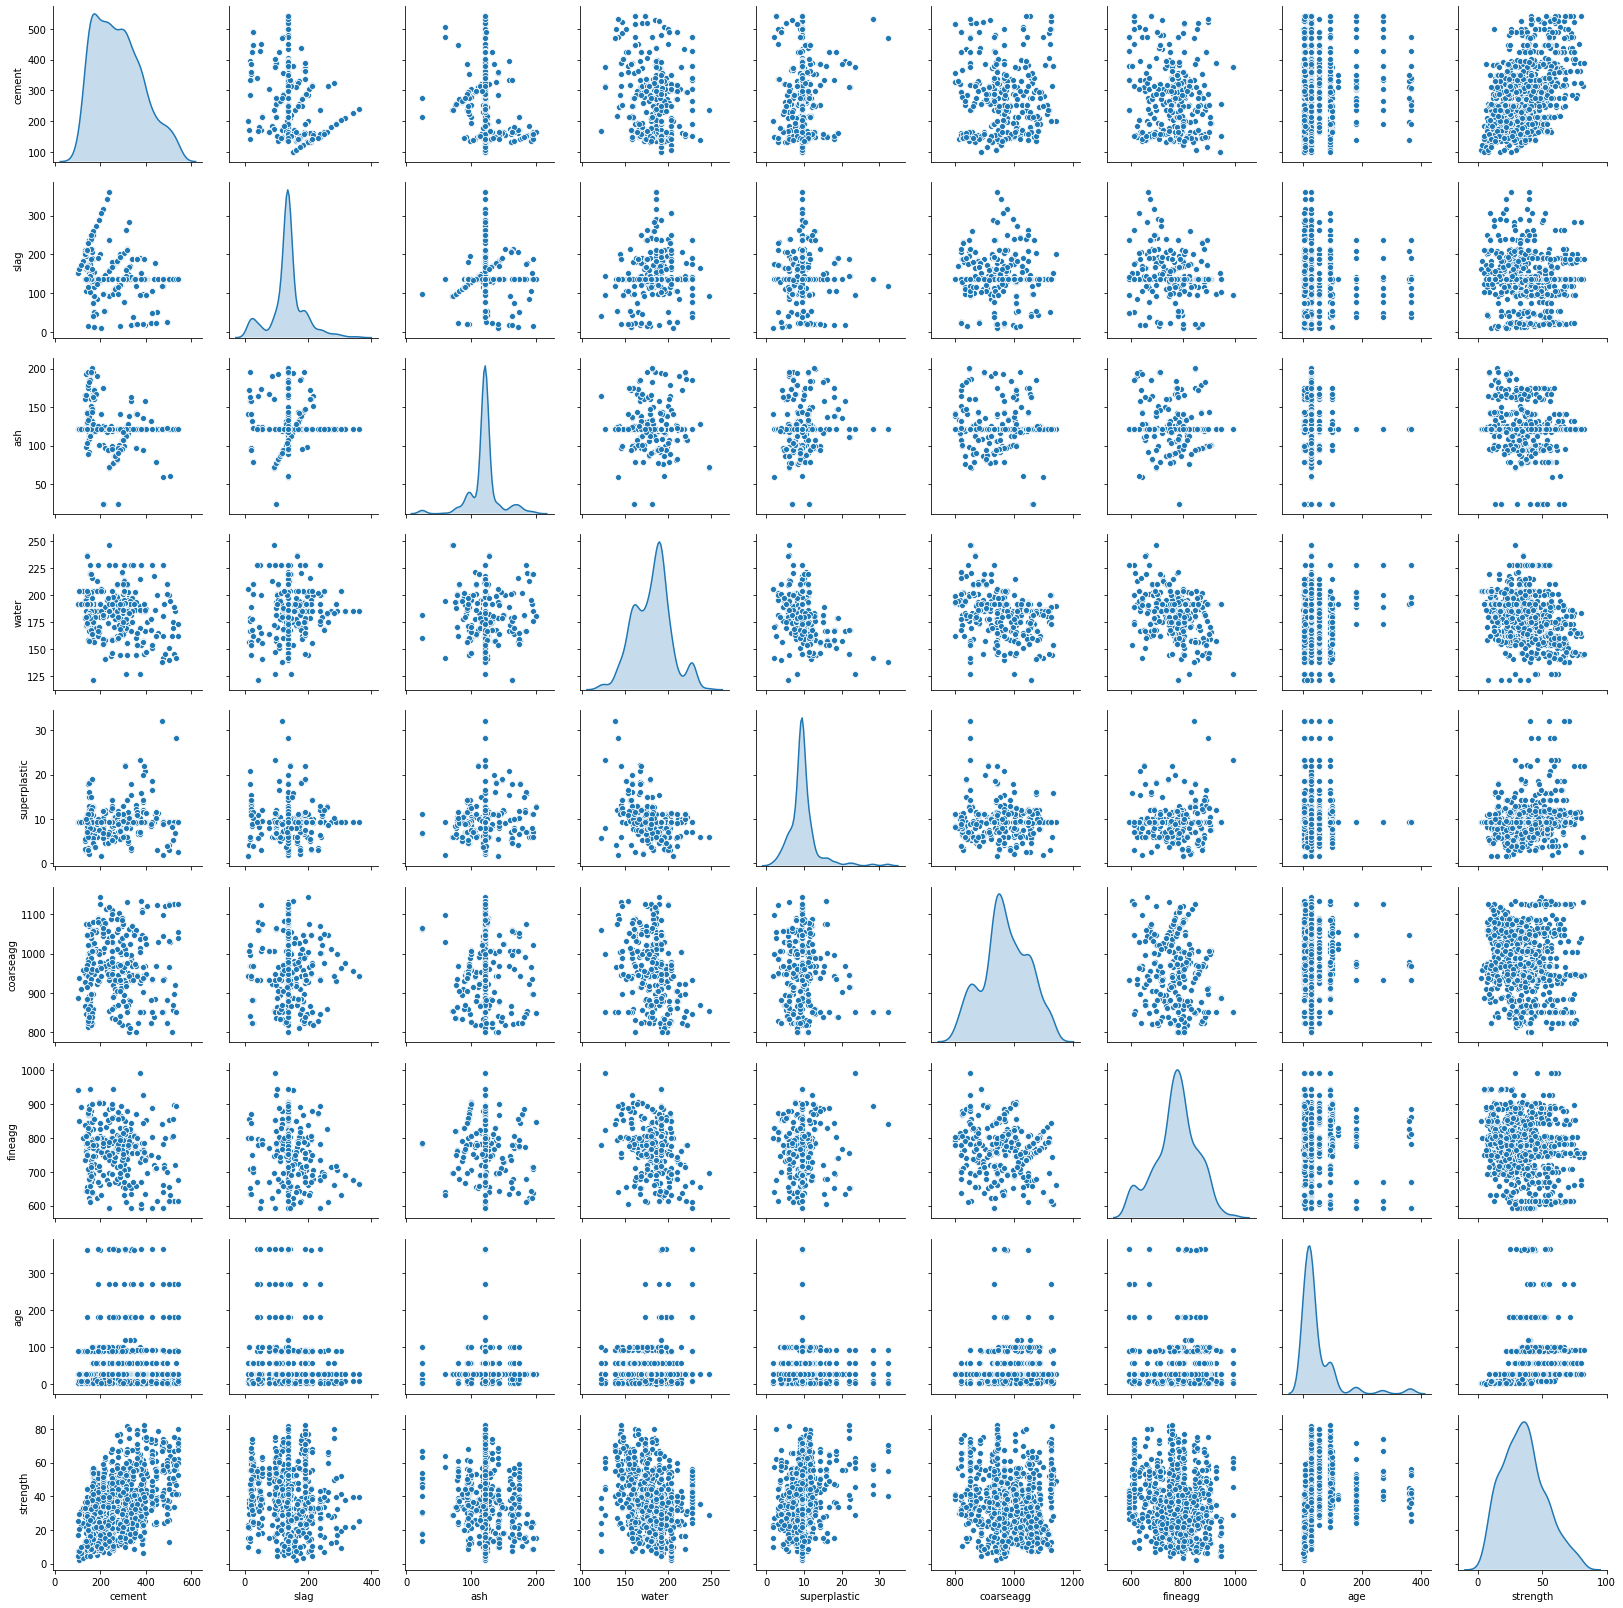

In [28]:
#Finding the correlation between different columns using pairplot
sns.pairplot(df_concrete.iloc[:,0:9],diag_kind='kde')

# Findings from pairplots 

1. Almost all the components have data from multiple guassians.

2. Number of clusters seems to be in between data frame is 3-9.

3. Target column strength is normally distributed.


# Distribution plot for column strength

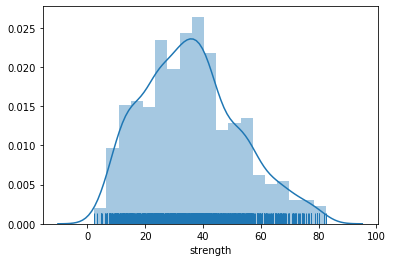

In [29]:
# Hexbin plot with bivariate distribution
sns.distplot(df_concrete['strength'],hist=True, rug=True)

# Displaying the figure
#plt.show()

# Correlation 

In [30]:
df_concrete.corr()


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.257057,-0.196231,-0.081587,0.276856,-0.109349,-0.222718,0.081946,0.497832
slag,-0.257057,1.000000,0.046546,0.190766,0.021271,0.006770,-0.171175,-0.031405,-0.076045
ash,-0.196231,0.046546,1.000000,-0.029037,0.036498,-0.011546,-0.097634,0.001532,-0.130794
water,-0.081587,0.190766,-0.029037,1.000000,-0.420512,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.276856,0.021271,0.036498,-0.420512,1.000000,-0.177896,0.156046,-0.010325,0.241681
coarseagg,-0.109349,0.006770,-0.011546,-0.182294,-0.177896,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.171175,-0.097634,-0.450661,0.156046,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.031405,0.001532,0.277618,-0.010325,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,-0.076045,-0.130794,-0.289633,0.241681,-0.164935,-0.167241,0.328873,1.000000


# Heat map plotting 

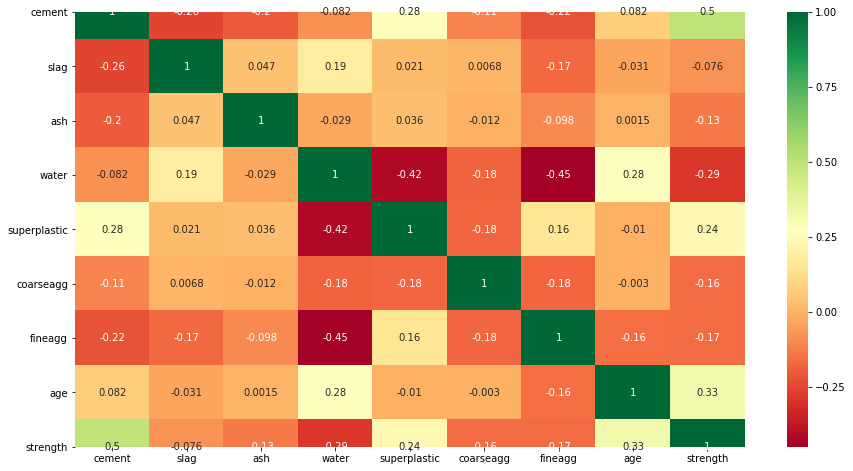

In [31]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(15, 8)) 
sns.heatmap(df_concrete.corr(),annot=True,cmap="RdYlGn")

In [32]:
np.isnan(df_concrete).any()
np.isinf(df_concrete).any()



cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

In [33]:
#Drop the column based on correlation
cor=df_concrete.corr()
cor_target=abs(cor["strength"])
#df['two'].between(-0.5, 0.5, inclusive=False)
weak_features=cor_target[cor_target.between(-0.5, 0.5, inclusive=False)] 
weak_features.loc['slag']
list(weak_features.index.values.tolist()) 

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age']

In [34]:
df_concrete.var()

cement          10921.580220
slag             2838.741024
ash               510.567638
water             456.002651
superplastic       13.292757
coarseagg        6045.677357
fineagg          6428.187792
age              3990.437729
strength          279.081814
dtype: float64

# Dropping the columns having weak correlation

In [35]:
# Dropping the column with weak correlation 
#dropping the independent column with weak correlation 
df_concrete_corr=df_concrete.copy()
low_corr_columns=list(weak_features.index.values.tolist())
for items in low_corr_columns:
    print (items)
    df_concrete_corr.drop([items],axis=1,inplace=True)
df_concrete_corr.dtypes

cement
slag
ash
water
superplastic
coarseagg
fineagg
age


strength    float64
dtype: object

# Verifying the performance when the columns are dropped 

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [37]:
#Normalizing the data
from scipy.stats import zscore
df_concrete_corr=df_concrete_corr.apply(zscore)


In [38]:
#independent variable
X=df_concrete_corr.iloc[:,0:8]
#dependent variable
y=df_concrete_corr['strength']


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [40]:
#fit a simple linear model

In [41]:
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
#Finding the score
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

1.0
1.0


### model performance after dropping features based on correlation

Dropping the columns based on **correlation coefficient** does not seems to have good result, its almost dropping all the columns and making this model **over fit**

#  K-Means cluster to address multiple guassian distribution 

In [43]:
df_k_concrete=df_concrete.iloc[:,0:9].apply(zscore)
df_k_concrete.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age             float64
strength        float64
dtype: object

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

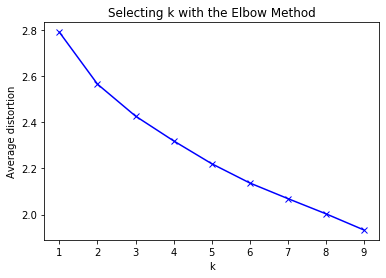

In [44]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_k_concrete)
    prediction=model.predict(df_k_concrete)
    meanDistortions.append(sum(np.min(cdist(df_k_concrete, model.cluster_centers_, 'euclidean'), axis=1)) / df_k_concrete.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


# Looking from this, it seems that K =6 or K=8 would be right choice to implement,although elbow plot is not much clear

In [45]:
#k=5
final_model=KMeans(6)
final_model.fit(df_k_concrete)
prediction=final_model.predict(df_k_concrete)

#Append the prediction 
df_concrete["GROUP"] = prediction
df_k_concrete["GROUP"] = prediction
print("Groups Assigned : \n")
df_concrete.head(10)

Groups Assigned : 



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,GROUP
0,141.3,212.0,121.4,203.5,9.4,971.8,748.5,28,29.89,4
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,5
2,250.0,135.7,95.7,187.4,5.5,956.9,861.2,28,29.22,0
3,266.0,114.0,121.4,228.0,9.4,932.0,670.0,28,45.85,3
4,154.8,183.4,121.4,193.3,9.1,1047.4,696.7,28,18.29,4
5,255.0,135.7,121.4,192.0,9.4,889.8,945.0,90,21.86,0
6,166.8,250.2,121.4,203.5,9.4,975.6,692.6,7,15.75,4
7,251.4,135.7,118.3,188.5,6.4,1028.4,757.7,56,36.64,0
8,296.0,135.7,121.4,192.0,9.4,1085.0,765.0,28,21.65,0
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99,4


# Analyze the distribution of the data with (K = 6). One of the most informative visual tool is boxplot

In [46]:
df_concrete_cluster = df_concrete.groupby(['GROUP'])
df_concrete_cluster.mean()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
GROUP,,,,,,,,,
0,252.284935,133.066753,111.903636,187.130130,8.317662,986.364156,812.226234,31.820779,25.845351
1,391.181818,103.538636,116.029545,150.278409,17.140909,904.184091,859.159091,37.477273,53.136818
2,339.128846,128.682692,121.400000,213.576923,9.400000,967.853846,691.373077,273.076923,44.741923
3,388.756696,128.073661,115.545982,182.395536,9.262054,953.194196,716.644196,35.959821,50.389420
4,182.996324,213.936765,129.718382,194.355882,9.513235,948.805147,717.308088,27.882353,28.325221
5,196.175862,104.895862,147.559310,161.032414,9.554483,1033.839310,789.249655,37.489655,33.103172


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013AC8C3DF60>,
      dtype=object)

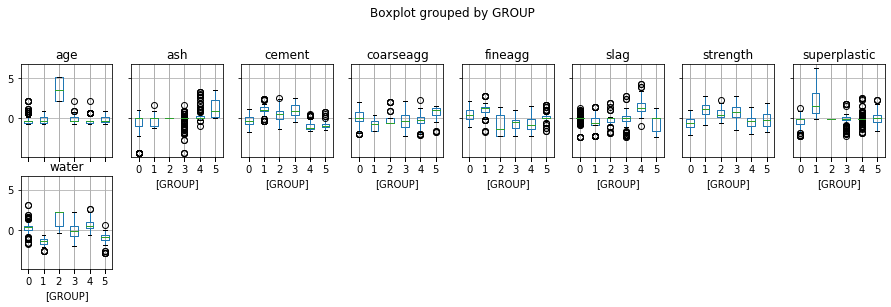

In [47]:
df_k_concrete.boxplot(by='GROUP', layout = (5,8),figsize=(15,10))

# Handling outliers in K means cluster approach

In [48]:
#Identifying and handling the outliers
data = df_k_concrete   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(df_k_concrete['GROUP']))

c:\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013ACB550B70>,
      dtype=object)

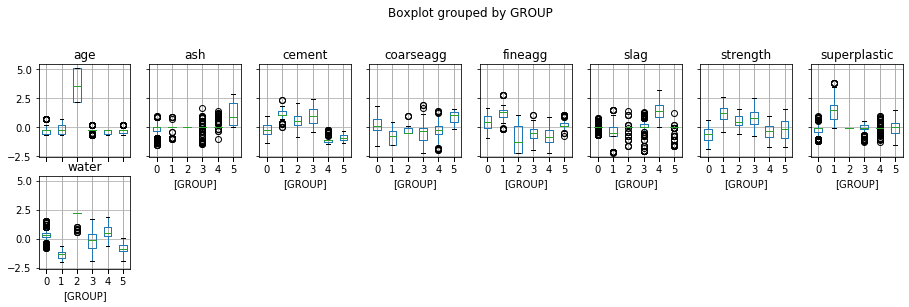

In [49]:
concat_data.boxplot(by = 'GROUP', layout=(5,8), figsize=(15, 10))

# Break cluster into different attributes

In [50]:
#STEP 7 - Break clusters into separate datasets and analyze individually


cluster_0 = concat_data[concat_data['GROUP']==0]
cluster_1 = concat_data[concat_data['GROUP']==1]
cluster_2 = concat_data[concat_data['GROUP']==2]
cluster_3 = concat_data[concat_data['GROUP']==3]
cluster_4 = concat_data[concat_data['GROUP']==4]
cluster_5 = concat_data[concat_data['GROUP']==5]


In [51]:
cluster_0.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,GROUP
2,-0.298384,-0.004674,-1.115770,0.273274,-1.142514,-0.206121,1.093371,-0.279733,-0.395144,0
5,-0.250517,-0.004674,0.022165,0.488793,-0.072306,-1.069519,0.407047,0.702224,-0.835925,0
7,-0.284981,-0.004674,-0.115096,0.324811,-0.895543,0.713893,-0.198167,0.163731,0.049231,0
8,0.141995,-0.004674,0.022165,0.488793,-0.072306,1.442184,-0.107073,-0.279733,-0.848501,0
11,-1.035539,-0.374600,0.022165,0.488793,-0.072306,-0.336081,1.038465,-0.675683,-1.729465,0


In [52]:
# Let us look at largecar pair panel

df_concrete_cluster_0 = cluster_0.iloc[:, 0:9]
df_concrete_cluster_1 = cluster_1.iloc[:, 0:9]
df_concrete_cluster_2 = cluster_2.iloc[:, 0:9]
df_concrete_cluster_3 = cluster_3.iloc[:, 0:9]
df_concrete_cluster_4 = cluster_4.iloc[:, 0:9]
df_concrete_cluster_5 = cluster_5.iloc[:, 0:9]
#df_concrete_cluster_6 = cluster_6.iloc[:, 0:9]
# CHANGE THE Clustertype AT THIS POINT TO CHECK HOW THE MODEL PERFORMS FOR EACH GROUP

#sns.pairplot(df_concrete_cluster_0, diag_kind='kde')

# Implementing a model on one cluster and see how well it performs

In [53]:
#Fitting linear model on cluster_0
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from scipy.stats import zscore
df_concrete_cluster_0=df_concrete_cluster_0.apply(zscore)


#independent variable
X=df_concrete_cluster_2.iloc[:,0:8]
#dependent variable
y=df_concrete_cluster_2['strength']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

regression_model=LinearRegression()
regression_model.fit(X_train,y_train)
for idx, col_name in enumerate(X_train.columns):
    #print (idx)
    #print (col_name)
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

y_pred = regression_model.predict(X_test)


The coefficient for cement is 0.22099171284807176
The coefficient for slag is 0.12155659280269088
The coefficient for ash is -1.1102230246251565e-16
The coefficient for water is 0.4674258896611847
The coefficient for superplastic is 1.1102230246251565e-16
The coefficient for coarseagg is -1.1544043795677137
The coefficient for fineagg is 0.25795201196614154
The coefficient for age is 0.05455508152239866


In [54]:
from sklearn import svm
clr = svm.SVR()  
clr.fit(X_train , y_train)
y_pred = clr.predict(X_test)


c:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [55]:
#Accuracy score of linear regression after using K-means clustering
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.49886854199873265
-1.4007879906949265


In [56]:
#Accuracy score of SVM after using K-means clustering
print(clr.score(X_train, y_train))
print(clr.score(X_test, y_test))

0.7872864331318823
-0.15551307250076496


# Observation after using K-means cluster 

1. We created **6 clusters** for the existing data
2. Run model on each cluster of data .
3. The accuracy score is very **poor** , which suggest that clustering is not the right approach for this data set.
4. We now will go for Random forest algoritham for feature selection.

# RANDOM FOREST FOR FEATURE SELECTION-OUTLIERS REMOVED

In [57]:
#drop the cluster
concate_data=concat_data.drop('GROUP',axis=1,inplace=True)
concat_data.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.428083,0.022165,1.027590,-0.072306,-0.014398,-0.312970,-0.279733,-0.355018
1,-1.074790,-0.004674,0.150570,-1.090116,0.311871,1.388141,0.282260,-0.501465,-0.737108
2,-0.298384,-0.004674,-1.115770,0.273274,-1.142514,-0.206121,1.093371,-0.279733,-0.395144
3,-0.145209,-0.412156,0.022165,-0.120282,-0.072306,-0.526517,-1.292542,-0.279733,0.600806
4,-1.209776,0.891033,0.022165,0.549700,-0.154630,0.958372,-0.959363,-0.279733,-1.049727
5,-0.250517,-0.004674,0.022165,0.488793,-0.072306,-1.069519,0.407047,0.702224,-0.835925
6,-1.094894,2.145400,0.022165,1.027590,-0.072306,0.034498,-1.010525,-0.612331,-1.201845
7,-0.284981,-0.004674,-0.115096,0.324811,-0.895543,0.713893,-0.198167,0.163731,0.049231
8,0.141995,-0.004674,0.022165,0.488793,-0.072306,1.442184,-0.107073,-0.279733,-0.848501
9,-1.207861,0.902300,0.978561,0.582497,-0.182071,-1.195619,-0.930662,-0.279733,-0.408918


In [58]:
#split the data
X=concat_data.iloc[:,0:8]
#dependent variable
y=concat_data['strength']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [59]:
import numpy as np
#from sklearn.ensemble import 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import utils
feat_labels = [x for x in concat_data.columns ]
feat_labels
clf = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1,oob_score=True,max_depth=5)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('cement', 0.39758571297428424)
('slag', 0.04163388002510506)
('ash', 0.014097835092181744)
('water', 0.14132251807209154)
('superplastic', 0.01643642857298584)
('coarseagg', 0.05196709749821553)
('fineagg', 0.03137795536489263)
('age', 0.3055785724002434)


In [60]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.10)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=5,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=-1,
                                                oob_score=True, random_state=0,
                                                verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=0.1)

In [61]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

cement
water
age


# SCATTER PLOT BETWEEN TARGET COLUMN AND MOST IMPORTANT FEATURES

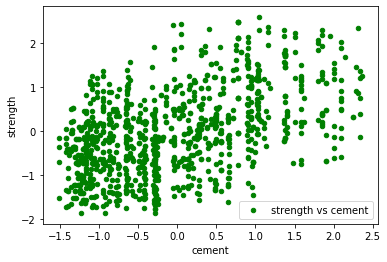

In [62]:
#Strenght vs cement
concat_data.plot(kind='scatter', y='strength',x='cement',color = 'Green',label ='strength vs cement')

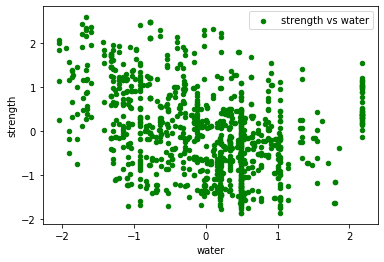

In [63]:
#Strength vs water
concat_data.plot(kind='scatter', y='strength',x='water',color = 'Green',label ='strength vs water')

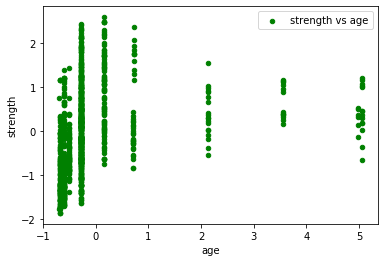

In [64]:
#Strenght vs age
concat_data.plot(kind='scatter', y='strength',x='age',color = 'Green',label ='strength vs age')

# Information from scatter plot


1.**Strength and cement** are **positively correlated**

2.**Strength and water** are **negatively correlated**

3.**age** indicates presence of **different guassian distribution**

### Applying random forest regressor on selected features only

In [65]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [66]:
# Create a new random forest Regressor for the most important features
clf_important = RandomForestRegressor(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10000,
                      n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [67]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature  Model
print (clf.score(X_train,y_train))
print (clf.score(X_test,y_test))


0.8188865427510685
0.737332968052171


In [68]:
clf_important = RandomForestRegressor(n_estimators=10000, random_state=0, n_jobs=-1,max_depth=5)
clf_important.fit(X_important_train, y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10000,
                      n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [69]:
y_important_pred = clf_important.predict(X_important_test)
print(clf_important.score(X_important_train, y_train))
print(clf_important.score(X_important_test, y_test))

0.773542792821444
0.6922689609424985


# Keypoints on Random forest regressior

 1. Random Forest regressior is suffering from **overfit model issue, its training score is greater then test score , however its still **better performing** then linear model and SVM regressior in terms of accuracy
 
2. max_depth has been set to 5 for random forest, as on this value the difference between training and accuracy score is less

3. There is no impact of dropping any feature, so we are not dropping any feature

# Some observations untill now

1. There is **no possibilty** of creating a **composite feature** from current attributes.


2. Dropping a feature - We have checked with correlation coefficient,K-means cluster,Random forest feature importance technique. all of them are pointing the same result, that **dropping a feature is not going to have any significant improvement in score**


3. Data looks like **mix of gaussianns**, we have created diffrerent features with the help of K-mean cluster, but it was not that helpful. the accuracy score was around **55%**.

# Regularising the models using Ridge and Lasso

In [70]:
#preparing a data frame to store result
result_column=['Non_Regularised_training_score','Non_Regularised_test_score','ridge_training_score','ridge_test_score','lasso_training_score','lasso_test_score']
result_index=['linear model','polynomial model']
result_df=pd.DataFrame(columns=result_column,index=result_index)

# Applying linear model 

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Normalizing the dataframe with z-score

In [72]:
from scipy.stats import zscore
#df_concrete=concat_data.copy()
#df_concrete=df_raw.copy()
df_concrete=df_concrete.apply(zscore)


# Split the dataset into training and test sets and fit the model. Also calculate R square

In [73]:
#independent variable
X=df_concrete.iloc[:,0:8]
#dependent variable
y=df_concrete['strength']


In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

# Fit a simple linear model 

In [75]:
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)
for idx, col_name in enumerate(X_train.columns):
    #print (idx)
    #print (col_name)
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for cement is 0.35647114766210236
The coefficient for slag is 0.1126307168673168
The coefficient for ash is -0.12810045021583827
The coefficient for water is -0.6633365538670835
The coefficient for superplastic is -0.136341352515493
The coefficient for coarseagg is -0.34211795156911035
The coefficient for fineagg is -0.3149142738039956
The coefficient for age is 0.4182678352132601


In [76]:
y_pred = regression_model.predict(X_test)

# Ridge model and coefficient 

In [77]:
ridge=Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model :",(ridge.coef_))

Ridge model : [ 0.35641932  0.11245418 -0.12798058 -0.66244819 -0.13589421 -0.3416438
 -0.31444044  0.41791583]


In [78]:
#LASSO model and coefficient 

In [79]:
lasso=Lasso(alpha=.01)
lasso.fit(X_train,y_train)
print ("lasso model : ",(lasso.coef_))


lasso model :  [ 0.34880389  0.09363558 -0.11498419 -0.61281681 -0.10158883 -0.31209904
 -0.28814399  0.39830221]


# Lets compare the scores 

In [80]:
result_column=['Non_Regularised_training_score','Non_Regularised_test_score','ridge_training_score','ridge_test_score','lasso_training_score','lasso_test_score']
result_index=['linear model','polynomial model']
result_df=pd.DataFrame(columns=result_column,index=result_index)

In [81]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

result_df.loc['linear model','Non_Regularised_training_score']=round(regression_model.score(X_train, y_train)*100,2)
result_df.loc['linear model','Non_Regularised_test_score']=round(regression_model.score(X_test, y_test)*100,2)


0.5842698813997371
0.637316574127877


In [82]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
result_df.loc['linear model','ridge_training_score']=round(ridge.score(X_train, y_train)*100,2)
result_df.loc['linear model','ridge_test_score']=round(ridge.score(X_test, y_test)*100,2)


0.5842693890352484
0.6372002739503954


In [83]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
result_df.loc['linear model','lasso_training_score']=round(lasso.score(X_train, y_train)*100,2)
result_df.loc['linear model','lasso_test_score']=round(lasso.score(X_test, y_test)*100,2)
result_df

0.5822119264138578
0.6295828885835493


,Non_Regularised_training_score,Non_Regularised_test_score,ridge_training_score,ridge_test_score,lasso_training_score,lasso_test_score
linear model,58.43,63.73,58.43,63.72,58.22,62.96
polynomial model,NaN,NaN,NaN,NaN,NaN,NaN


### Using polynomial model 

In [84]:
#Let us generate polynomial models reflecting the non-linear interaction between some dimensions¶

In [85]:
from sklearn.preprocessing import PolynomialFeatures

In [86]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [87]:
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(721, 37)

# Fit a simple non regularized linear model on poly features

In [88]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_)

[-1.34951159e-17  3.08944689e-01 -2.99800087e-03 -1.06629001e-01
 -7.61486550e-01 -1.75319366e-01 -4.00886590e-01 -4.41505407e-01
  8.56307778e-01 -2.24761945e-03  9.66640429e-02 -1.13918830e-01
 -7.71209538e-02  2.86718561e-03 -5.16784690e-03 -1.81544358e-01
 -5.83413048e-02 -2.18570334e-01 -1.05067787e-01 -1.12852289e-01
 -7.87699434e-02  5.77777311e-02 -2.42276941e-02 -7.09766861e-02
 -1.41363576e-02  1.64476551e-02 -1.12479812e-01 -5.09318601e-02
 -2.77387279e-02 -7.87799841e-03 -5.11845067e-01 -6.29375321e-03
  1.42946417e-03 -1.23062016e-01  4.44622458e-02 -2.43822867e-01
 -2.78915738e-01]


In [89]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))
result_df.loc['polynomial model','Non_Regularised_training_score']=round(regression_model.score(X_train, y_train)*100,2)
result_df.loc['polynomial model','Non_Regularised_test_score']=round(regression_model.score(X_test, y_test)*100,2)


0.711630039640357
0.7045705534609406


In [90]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.          0.30910952 -0.00261397 -0.10643714 -0.75961122 -0.17427835
 -0.39959548 -0.44032391  0.85336433 -0.00173312  0.0964469  -0.11404025
 -0.07701844  0.00250852 -0.00531359 -0.18107894 -0.05793184 -0.21762672
 -0.10430901 -0.11229058 -0.0782914   0.05721175 -0.0242585  -0.07082569
 -0.01423987  0.01623248 -0.11178563 -0.05074367 -0.027937   -0.00815189
 -0.50890141 -0.00621457  0.00151441 -0.12129102  0.04419344 -0.24140086
 -0.27727065]


In [91]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
result_df.loc['polynomial model','ridge_training_score']=round(ridge.score(X_train, y_train)*100,2)
result_df.loc['polynomial model','ridge_test_score']=round(ridge.score(X_test, y_test)*100,2)
result_df

0.7116264251740727
0.7047455538145511


,Non_Regularised_training_score,Non_Regularised_test_score,ridge_training_score,ridge_test_score,lasso_training_score,lasso_test_score
linear model,58.43,63.73,58.43,63.72,58.22,62.96
polynomial model,71.16,70.46,71.16,70.47,NaN,NaN


In [92]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


Lasso model: [ 0.00000000e+00  3.05312830e-01  2.52254208e-04 -5.74158479e-02
 -6.72601820e-01 -9.01966210e-02 -3.36006972e-01 -3.84582007e-01
  7.16856847e-01  1.69297537e-02  9.76624738e-02 -9.12405831e-02
 -3.10480179e-02 -0.00000000e+00 -0.00000000e+00 -1.60248693e-01
 -0.00000000e+00 -1.34188464e-01 -6.36948699e-03 -5.78488581e-02
 -3.95187013e-02  0.00000000e+00  0.00000000e+00 -1.56494250e-02
 -0.00000000e+00  0.00000000e+00 -3.34977198e-02 -1.18890567e-03
 -1.83327688e-02 -2.45330282e-02 -3.58733059e-01  0.00000000e+00
  3.21235913e-03 -0.00000000e+00  2.27122348e-02 -1.05948735e-01
 -1.85617057e-01]


In [93]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

result_df.loc['polynomial model','lasso_training_score']=round(lasso.score(X_train, y_train)*100,2)
result_df.loc['polynomial model','lasso_test_score']=round(lasso.score(X_test, y_test)*100,2)


0.695941970867462
0.7111341022085158


# Model performance 

# Results after regularisation 

In [94]:

result_df

,Non_Regularised_training_score,Non_Regularised_test_score,ridge_training_score,ridge_test_score,lasso_training_score,lasso_test_score
linear model,58.43,63.73,58.43,63.72,58.22,62.96
polynomial model,71.16,70.46,71.16,70.47,69.59,71.11


# KEY OBSERVATION

# CROSS VALIDATAION

we will apply cross validation here to improve the accuracy

### Cross validation score with linear model

In [95]:
#Creating dataframe to store result
cv_column=['score','std','lower_range','upper_range']
cv_index=['linear_regression','polynomial_model','ridge','lasso','randomforest','svr']
df_cv=pd.DataFrame(columns=cv_column,index=cv_index)


In [96]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds=50
seed=7
kfold=KFold(n_splits=num_folds,random_state=seed)
model=LinearRegression()
result=cross_val_score(model,X,y,cv=kfold)
print (result)
print ("Accuracy: %3F%%(%3F%%)"%(result.mean()*100,result.std()*100))

df_cv.loc['linear_regression','score']=round(result.mean()*100,2)
df_cv.loc['linear_regression','std']=round(result.std()*100,2)
df_cv.loc['linear_regression','lower_range']=round(result.mean()*100-result.std()*100*2,2)
df_cv.loc['linear_regression','upper_range']=round(result.mean()*100+result.std()*100*2,2)


[0.24219673 0.41046151 0.3455688  0.0217067  0.73217008 0.64277801
 0.49937298 0.63845966 0.825722   0.5525588  0.61002152 0.76202368
 0.75514632 0.62928614 0.62488162 0.30778344 0.33018902 0.57552462
 0.74121359 0.74214318 0.68241262 0.46617991 0.55264406 0.43975411
 0.44195926 0.66442195 0.58538772 0.52861809 0.62483165 0.60561092
 0.5473637  0.78779401 0.39148808 0.58745063 0.42761383 0.71619458
 0.25757316 0.09673534 0.52232514 0.6499981  0.4997102  0.28211273
 0.76009186 0.32295805 0.4104794  0.69254212 0.44844617 0.35579764
 0.49787717 0.61178695]
Accuracy: 52.894735%(17.823722%)


### Cross validation score with Polynomial model

In [97]:
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds=50
seed=7
kfold=KFold(n_splits=num_folds,random_state=seed)
model=LinearRegression()
result=cross_val_score(model,X_poly,y,cv=kfold)
print (result)
print ("Accuracy: %3F%%(%3F%%)"%(result.mean()*100,result.std()*100))
df_cv.loc['polynomial_model','score']=round(result.mean()*100,2)
df_cv.loc['polynomial_model','std']=round(result.std()*100,2)
df_cv.loc['polynomial_model','lower_range']=round(result.mean()*100-result.std()*100*2,2)
df_cv.loc['polynomial_model','upper_range']=round(result.mean()*100+result.std()*100*2,2)


[0.50766421 0.53550991 0.33208333 0.25671544 0.62868222 0.66040356
 0.59942313 0.48930805 0.86100952 0.60403567 0.74636783 0.85551588
 0.77802157 0.66980451 0.5936679  0.43542912 0.6338023  0.64607685
 0.75157484 0.76384197 0.823926   0.76924835 0.56717473 0.49285438
 0.51342247 0.73612216 0.61822319 0.80715541 0.69626222 0.60554846
 0.69299181 0.8398414  0.69477    0.69445466 0.56016864 0.8663758
 0.76477967 0.20438663 0.72027522 0.72415632 0.655667   0.44773968
 0.7590217  0.60621721 0.68490315 0.65580846 0.53043594 0.52965495
 0.58504065 0.70047523]
Accuracy: 63.792079%(14.428251%)


### Cross validation score with Support vector regressior

In [98]:
from sklearn import svm
#clr = 
num_folds=50
seed=7
kfold=KFold(n_splits=num_folds,random_state=seed)
model=svm.SVR() 
result=cross_val_score(model,X,y,cv=kfold)
print (result)
print ("Accuracy: %3F%%(%3F%%)"%(result.mean()*100,result.std()*100))
df_cv.loc['svr','score']=round(result.mean()*100,2)
df_cv.loc['svr','std']=round(result.std()*100,2)
df_cv.loc['svr','lower_range']=round(result.mean()*100-result.std()*100*2,2)
df_cv.loc['svr','upper_range']=round(result.mean()*100+result.std()*100*2,2)
df_cv

c:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'aut

c:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'aut

[0.81531187 0.85966547 0.66351455 0.82932707 0.8563184  0.72127316
 0.8016142  0.81907585 0.8638842  0.81564693 0.8606186  0.89516892
 0.90495678 0.78587607 0.84461478 0.56263428 0.79651162 0.91378688
 0.87869286 0.8545415  0.87415629 0.7640739  0.93490951 0.64706592
 0.69350037 0.86091368 0.81560505 0.86551633 0.91185983 0.75090725
 0.87621827 0.91395682 0.87845713 0.82332971 0.78502112 0.90805256
 0.76755792 0.56029252 0.71648145 0.79488831 0.80328847 0.71518706
 0.8544332  0.79771185 0.73732599 0.74045956 0.84118481 0.7166141
 0.80729283 0.82135535]
Accuracy: 80.641302%(8.394031%)


c:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,score,std,lower_range,upper_range
linear_regression,52.89,17.82,17.25,88.54
polynomial_model,63.79,14.43,34.94,92.65
ridge,NaN,NaN,NaN,NaN
lasso,NaN,NaN,NaN,NaN
randomforest,NaN,NaN,NaN,NaN
svr,80.64,8.39,63.85,97.43


### Cross validation score with Random forest regressior

In [99]:
#
from sklearn import svm
#clr = 
num_folds=50
seed=7
kfold=KFold(n_splits=num_folds,random_state=seed)
model=RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1,oob_score=True,max_depth=5)
result=cross_val_score(model,X,y,cv=kfold)
print (result)
print ("Accuracy: %3F%%(%3F%%)"%(result.mean()*100,result.std()*100))
df_cv.loc['randomforest','score']=round(result.mean()*100,2)
df_cv.loc['randomforest','std']=round(result.std()*100,2)
df_cv.loc['randomforest','lower_range']=round(result.mean()*100-result.std()*100*2,2)
df_cv.loc['randomforest','upper_range']=round(result.mean()*100+result.std()*100*2,2)


[0.50739767 0.76393355 0.72021656 0.49488031 0.90677148 0.65603549
 0.70930766 0.73603661 0.88056174 0.72667263 0.81500152 0.86914997
 0.89422673 0.8898439  0.81617839 0.73786964 0.76014206 0.79615508
 0.76544121 0.81696759 0.84880525 0.74283679 0.91463358 0.66377062
 0.84436209 0.86365303 0.81724841 0.82461779 0.89800811 0.7561489
 0.75595711 0.79861687 0.86706403 0.84846835 0.72930948 0.85414788
 0.87865956 0.62109959 0.82441636 0.71508641 0.80521066 0.69231235
 0.84066223 0.92542709 0.83398045 0.81141777 0.88313974 0.72262102
 0.70537854 0.80963435]
Accuracy: 78.718968%(9.321018%)


### Cross validation score with ridge

In [100]:
from sklearn import svm
#clr = 
num_folds=50
seed=7
kfold=KFold(n_splits=num_folds,random_state=seed)
model=Ridge(alpha=.3)
result=cross_val_score(model,X,y,cv=kfold)
print (result)
print ("Accuracy: %3F%%(%3F%%)"%(result.mean()*100,result.std()*100))
df_cv.loc['ridge','score']=round(result.mean()*100,2)
df_cv.loc['ridge','std']=round(result.std()*100,2)
df_cv.loc['ridge','lower_range']=round(result.mean()*100-result.std()*100*2,2)
df_cv.loc['ridge','upper_range']=round(result.mean()*100+result.std()*100*2,2)


[0.24252262 0.41104185 0.34563805 0.02269572 0.7323848  0.64263591
 0.49933649 0.6384561  0.82552229 0.55229397 0.60994427 0.76194282
 0.75506104 0.62927733 0.62499337 0.30827284 0.33001539 0.57561861
 0.74101049 0.74205203 0.68243069 0.46634026 0.55263428 0.43967945
 0.44199511 0.66410703 0.58563583 0.52875876 0.62470612 0.60546566
 0.54732543 0.78763362 0.39158322 0.58727653 0.42770448 0.71598668
 0.25761233 0.09794065 0.52246488 0.64990718 0.49969295 0.28252496
 0.76001601 0.32308733 0.41080927 0.69236608 0.44839747 0.35597724
 0.49784577 0.61166437]
Accuracy: 52.900571%(17.803052%)


# Cross validation score with lasso

In [101]:
num_folds=50
seed=7
kfold=KFold(n_splits=num_folds,random_state=seed)
model=Lasso(alpha=0.01)
result=cross_val_score(model,X,y,cv=kfold)
print (result)
print ("Accuracy: %3F%%(%3F%%)"%(result.mean()*100,result.std()*100))
df_cv.loc['lasso','score']=round(result.mean()*100,2)
df_cv.loc['lasso','std']=round(result.std()*100,2)
df_cv.loc['lasso','lower_range']=round(result.mean()*100-result.std()*100*2,2)
df_cv.loc['lasso','upper_range']=round(result.mean()*100+result.std()*100*2,2)


[0.25568256 0.46344785 0.35413029 0.0862054  0.74720994 0.63845487
 0.49505388 0.6381111  0.80798266 0.52772561 0.60287865 0.75384344
 0.7442018  0.62664967 0.63098693 0.3347417  0.31904003 0.58481898
 0.71648567 0.72839108 0.67930189 0.47345014 0.54809979 0.43295459
 0.44030471 0.64179974 0.60815774 0.53414236 0.61471519 0.58467237
 0.53959552 0.77241124 0.39991213 0.5741127  0.42773295 0.69805832
 0.24959696 0.17446217 0.53591141 0.64042239 0.50210505 0.316642
 0.75556655 0.32429387 0.42607355 0.67875074 0.44070636 0.37046349
 0.49691537 0.60382032]
Accuracy: 53.082387%(16.464629%)


# Cross validation score from all model

1. Among all the regressior and polynomial features result, we have seen that random **forest regressior is having a good accuracy score of 81%**

2. it has **standard deviation of 8**, that means that it can give the accuracy in **range of 71 % to 97 % **

3. We will proceed on model tuning with random forest regressor

In [102]:
df_cv

,score,std,lower_range,upper_range
linear_regression,52.89,17.82,17.25,88.54
polynomial_model,63.79,14.43,34.94,92.65
ridge,52.9,17.8,17.29,88.51
lasso,53.08,16.46,20.15,86.01
randomforest,78.72,9.32,60.08,97.36
svr,80.64,8.39,63.85,97.43


# Model Tuning and performance - with original raw data

As i was already suspicious that outliers and zero values are actually correct, so here i would use original data without
any modification , and will see how it works

In [103]:
#Creating an empty dataframe to show the result in last
model_tuning_column=['train_score','test_score']
tuning_index=['Randomsearch_cv','GridSearch_cv']
model_tuning_df=pd.DataFrame(columns=model_tuning_column,index=tuning_index)


# Random Search CV and random forest regressor

In [104]:
import numpy as np
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

In [105]:
#independent variable
X=df_concrete_orig.iloc[:,0:8]
#dependent variable
y=df_concrete_orig['strength']


In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [107]:
rfr=RandomForestRegressor(n_estimators=100)

In [108]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 9),
              "min_samples_split": sp_randint(2, 9),
              "min_samples_leaf": sp_randint(1, 9),
             # "bootstrap": [True, False],
              "criterion": ["mse", "mae"]}

In [109]:
# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples) #default cv = 3

In [110]:
randomCV.fit(X_train, y_train)

 
print(randomCV.best_params_)


c:\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'criterion': 'mae', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [111]:
model_tuning_df.loc['Randomsearch_cv','train_score']=round(randomCV.score(X_train, y_train)*100,2)
model_tuning_df.loc['Randomsearch_cv','test_score']=round(randomCV.score(X_test, y_test)*100,2)

In [112]:
print (randomCV.score(X_test,y_test))

0.8989500609615348


In [113]:
#model_tuning_df

# GRID SEARCH CV with Random forest regressior

In [114]:
#defining parameter_grid for Grid_search
param_grid = {"max_depth": [3, None],
              "max_features": [1,3,5],
              "min_samples_split": [2,3,7],
              "min_samples_leaf": [2,3,6],
             # "bootstrap": [True, False],
              "criterion": ["mse", "mae"]}

In [115]:
grid_search = GridSearchCV(rfr, param_grid=param_grid)
start = time()
grid_search.fit(X_train, y_train)

c:\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 

In [116]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [117]:
grid_search.cv_results_['mean_test_score'].max()

0.8761010860094629

In [118]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [119]:
print (grid_search.score(X_test,y_test))

0.9005151276325285


In [120]:
model_tuning_df.loc['GridSearch_cv','train_score']=round(grid_search.score(X_train, y_train)*100,2)
model_tuning_df.loc['GridSearch_cv','test_score']=round(grid_search.score(X_test, y_test)*100,2)

# Closing remarks

It was a tricky project,some key observations 

1. With original data , without any outlier removal and zero value replacement , we are getting highest accuracy 97% after model tuning

2. With outlier removed and zero values replaced , accuracy was around 89% after model tuning

3. With model tuning,  accuracy has  been increased from 96% to 97% , however there is still drop in test_score as compared to train_score.

4. **Random search cv** is giving better result as compared to **Grid search cv**

5. In cross validation score , **random forest** was winner , with accuracy range of **64.97% to 97.06%**

6. During normalization of model, **polynomial model was winner**

7. Feature reduction did not performed much well , and result in very low accuracy of 55% and sometimes over-fit models

8. creating cluster of different Gaussian was also not much helpful, as the accuracy score was around 50%


In [121]:
#result of grid search and random search model
model_tuning_df

,train_score,test_score
Randomsearch_cv,97.28,89.9
GridSearch_cv,96.96,90.05


In [122]:
#cross validation score , across models
df_cv

,score,std,lower_range,upper_range
linear_regression,52.89,17.82,17.25,88.54
polynomial_model,63.79,14.43,34.94,92.65
ridge,52.9,17.8,17.29,88.51
lasso,53.08,16.46,20.15,86.01
randomforest,78.72,9.32,60.08,97.36
svr,80.64,8.39,63.85,97.43


In [123]:
#linear model with and without regularization
result_df

,Non_Regularised_training_score,Non_Regularised_test_score,ridge_training_score,ridge_test_score,lasso_training_score,lasso_test_score
linear model,58.43,63.73,58.43,63.72,58.22,62.96
polynomial model,71.16,70.46,71.16,70.47,69.59,71.11
